In [1]:
import numpy as np
import pandas as pd

from keras.datasets import cifar10
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from keras.layers import Dropout
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train_=X_train
X_test_=X_test

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

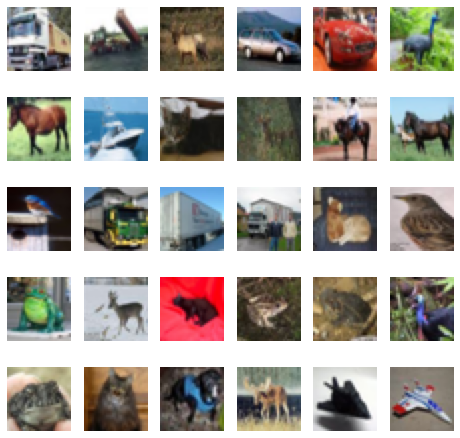

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = X_train_[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()


Reshaping the data so that t can be fit into MLP classifier

In [ ]:

X_train = X_train.reshape(-1, 3072)

In [ ]:
X_test=X_test.reshape(-1,3072)

Preprocessing the data

In [ ]:
 X_train = X_train.astype("float32") / 255

In [ ]:
X_train

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [ ]:
X_test = X_test.astype("float32") / 255

In [ ]:
y_train=y_train.reshape(-1)

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
y_train.shape

(50000,)

In [ ]:

model = Sequential()

#Input Layer
model.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train.shape[1]))

#Hidden Layer

model.add(Dense(3000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='relu'))



#output layer
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.9345 - accuracy: 0.2997
Epoch 2/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.6459 - accuracy: 0.4199
Epoch 3/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.5474 - accuracy: 0.4489
Epoch 4/10
1563/1563 [==============================] - 209s 133ms/step - loss: 1.4746 - accuracy: 0.4783
Epoch 5/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.4221 - accuracy: 0.4979
Epoch 6/10
1563/1563 [==============================] - 207s 132ms/step - loss: 1.3740 - accuracy: 0.5139
Epoch 7/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.3375 - accuracy: 0.5291
Epoch 8/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.2956 - accuracy: 0.5411
Epoch 9/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.2632 - accuracy: 0.5535
Epoch 10/10
1563/1563 [=======================

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
predicted_class = [np.argmax(element) for element in y_predict]

In [ ]:
y_predict

array([[0.4768981 , 0.51198393, 0.84312123, ..., 0.04878217, 0.49470934,
        0.07504988],
       [0.9875248 , 0.9732078 , 0.5360343 , ..., 0.12106711, 0.9412285 ,
        0.9767557 ],
       [0.99579763, 0.9242217 , 0.5594348 , ..., 0.2930684 , 0.94071484,
        0.8016545 ],
       ...,
       [0.09515166, 0.02089137, 0.97275794, ..., 0.58389497, 0.40561312,
        0.15196025],
       [0.6453647 , 0.24697876, 0.9212638 , ..., 0.7031126 , 0.09545732,
        0.11953923],
       [0.7769518 , 0.26731706, 0.7787761 , ..., 0.941646  , 0.11949682,
        0.22098136]], dtype=float32)

In [ ]:
accuracy_MLP= accuracy_score(predicted_class,y_test)
accuracy_MLP

0.4811

In [ ]:
print("Classification Report: \n", classification_report(y_test,predicted_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.81      0.52      1000
           1       0.59      0.71      0.64      1000
           2       0.39      0.42      0.40      1000
           3       0.43      0.26      0.33      1000
           4       0.34      0.62      0.44      1000
           5       0.59      0.21      0.31      1000
           6       0.65      0.44      0.52      1000
           7       0.54      0.60      0.57      1000
           8       0.76      0.39      0.51      1000
           9       0.70      0.36      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.54      0.48      0.47     10000
weighted avg       0.54      0.48      0.47     10000



In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

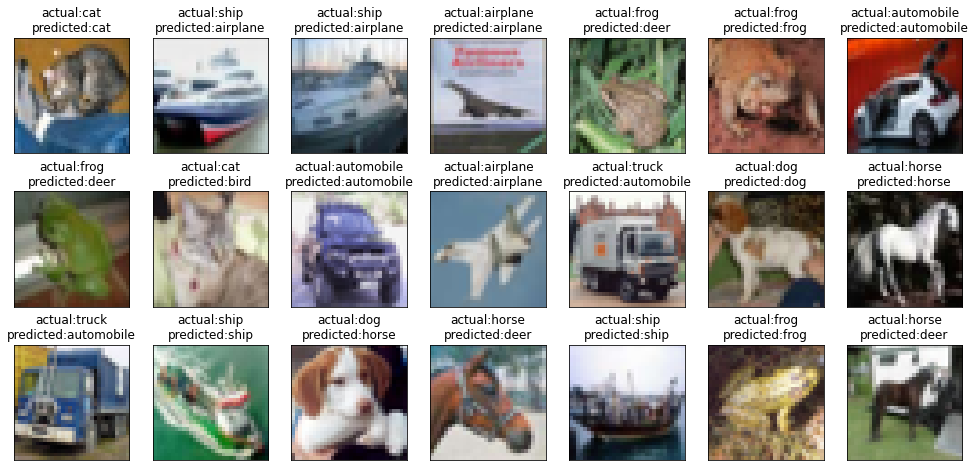

In [ ]:


labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' 
                            + 'predicted:' + labels[predicted_class[index]])
        axes[i,j].imshow(X_test_[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Grey scale images

In [ ]:
(X_train_, y_train_), (X_test_, y_test_) = cifar10.load_data()

In [ ]:
X_train2 = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train_])
X_test2 = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test_])

In [ ]:
X_train2.shape

(50000, 32, 32)

In [ ]:
X_train2duplicate=X_train2
X_test2duplicate=X_test2

In [ ]:
X_train2 = X_train2.reshape(-1,1024)
X_test2 = X_test2.reshape(-1,1024)

In [ ]:
X_train2  = X_train2/255
X_test2  = X_test2/255

In [ ]:
model2 = Sequential()

#Input Layer
model2.add(Dense(X_train2.shape[1], activation='relu', input_dim = X_train2.shape[1]))

#Hidden Layer

model2.add(Dense(1000, activation='relu'))

model2.add(Dense(300, activation='relu'))



#output layer
model2.add(Dense(10, activation = 'sigmoid'))

model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train2, y_train_, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.1003 - accuracy: 0.2353
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8913 - accuracy: 0.3316
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7947 - accuracy: 0.3663
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7452 - accuracy: 0.3845
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6962 - accuracy: 0.4050
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6500 - accuracy: 0.4209
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6210 - accuracy: 0.4249
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5872 - accuracy: 0.4436
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5493 - accuracy: 0.4548
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [ ]:

y_predict_grey = model2.predict(X_test2)
predicted_class2 = [np.argmax(element) for element in y_predict_grey]

In [ ]:

accuracy_MLP2= accuracy_score(predicted_class2,y_test_)
accuracy_MLP2

0.4045

In [ ]:
print("Classification Report: \n", classification_report(y_test_,predicted_class2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.19      0.29      1000
           1       0.50      0.54      0.52      1000
           2       0.28      0.40      0.33      1000
           3       0.32      0.23      0.27      1000
           4       0.32      0.41      0.36      1000
           5       0.40      0.38      0.39      1000
           6       0.42      0.51      0.46      1000
           7       0.40      0.61      0.48      1000
           8       0.68      0.24      0.36      1000
           9       0.48      0.54      0.50      1000

    accuracy                           0.40     10000
   macro avg       0.44      0.40      0.40     10000
weighted avg       0.44      0.40      0.40     10000



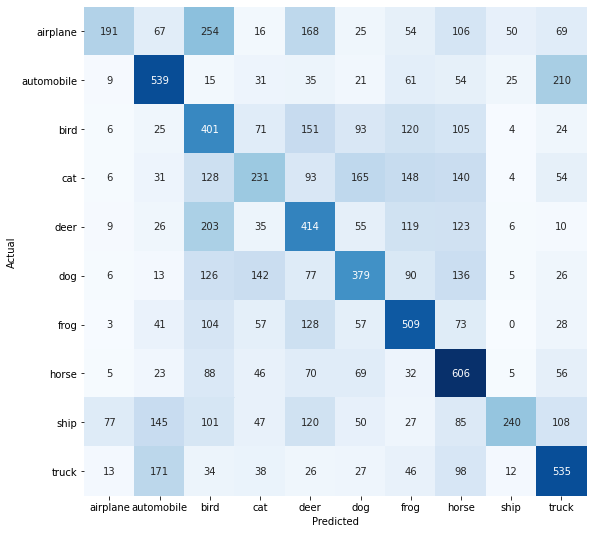

In [ ]:


labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm = confusion_matrix(y_test_, predicted_class2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test_2=y_test_.reshape(-1)
y_test_2

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

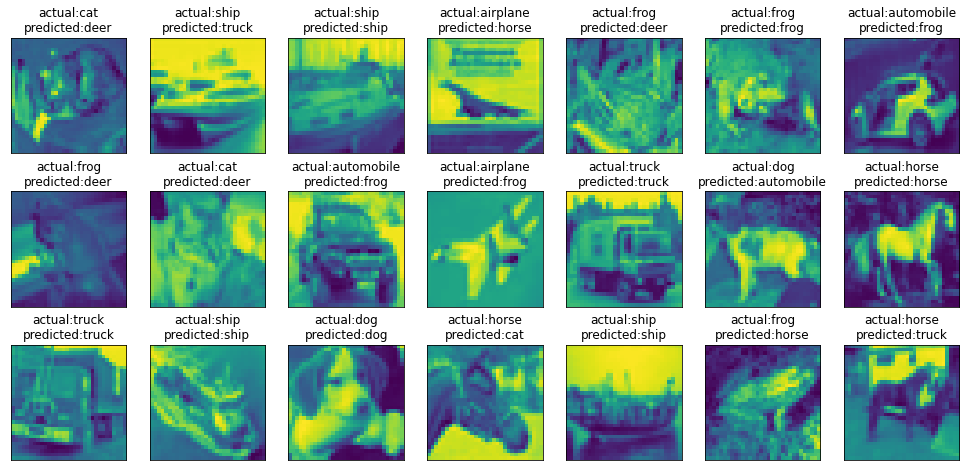

In [ ]:



fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test_2[index]] + '\n' 
                            + 'predicted:' + labels[predicted_class2[index]])
        axes[i,j].imshow(X_test2duplicate[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()